<a href="https://colab.research.google.com/github/Wonhochoi123/Mid-term-project/blob/master/model.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
gpu_info = !nvidia-smi
gpu_info = '\n'.join(gpu_info)
if gpu_info.find('failed') >= 0:
  print('Select the Runtime > "Change runtime type" menu to enable a GPU accelerator, ')
  print('and then re-execute this cell.')
else:
  print(gpu_info)

Sun May 16 17:50:25 2021       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 465.19.01    Driver Version: 460.32.03    CUDA Version: 11.2     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla V100-SXM2...  Off  | 00000000:00:04.0 Off |                    0 |
| N/A   36C    P0    24W / 300W |      0MiB / 16160MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

In [1]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

import shutil

shutil.copy('/content/gdrive/MyDrive/Dataset2.zip','/content/Dataset2.zip')



'/content/Dataset2.zip'

In [ ]:
# Navigate to the copied file and unzip it quietly
!unzip -q '/content/Dataset2.zip'

classes_train/BKL/ISIC_0063993.jpg  bad CRC 190d73bb  (should be 97b29ea1)
classes_train/BKL/ISIC_0072343.jpg  bad CRC f577bf6b  (should be 76429ba7)
classes_train/BKL/ISIC_0072421.jpg  bad CRC 2a828e7d  (should be 2240415f)
classes_train/MEL/ISIC_0032396.jpg  bad CRC 1397f0c9  (should be b0c49090)
classes_train/MEL/ISIC_0053960.jpg  bad CRC 02e8a7a4  (should be 3a50f216)
classes_train/MEL/ISIC_0057044.jpg  bad CRC cf9c2ae4  (should be 3bd4fcaa)
classes_train/MEL/ISIC_0057048.jpg  bad CRC fb2fb66c  (should be 409e0d3a)
classes_train/MEL/ISIC_0061049.jpg  bad CRC 08f30e5c  (should be ed58c0ff)
classes_train/NV/ISIC_0025028.jpg  bad CRC a73ceb4b  (should be 3bcc4e54)
classes_train/NV/ISIC_0025042.jpg  bad CRC b18fb418  (should be 0308d4c0)
classes_train/NV/ISIC_0025406.jpg  bad CRC e2c13866  (should be 2fefaa14)
classes_train/NV/ISIC_0027530.jpg  bad CRC 83d26a31  (should be 659b5124)
classes_train/NV/ISIC_0027547.jpg  bad CRC 297c247c  (should be 6589dc32)
classes_train/NV/ISIC_0030049.

In [ ]:
import random
from scipy import ndarray
import skimage as sk
from skimage import transform
from skimage import util

def random_rotation(image_array: ndarray):
    # pick a random degree of rotation between 25% on the left and 25% on the right
    random_degree = random.uniform(-50,50 )
    return sk.transform.rotate(image_array, random_degree)

def random_noise(image_array: ndarray):
    # add random noise to the image
    return sk.util.random_noise(image_array)

def horizontal_flip(image_array: ndarray):
    # horizontal flip doesn't need skimage, it's easy as flipping the image array of pixels !
        return image_array[:, ::-1]

In [ ]:


def oversample(target_num_image):
    import random
    import os
    import skimage.io
    import glob


    for j in ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']:
        # our folder path containing some images
        folder_path = "/content/classes_train/"+j
        # the number of file to generate
        num_files_desired = target_num_image-len(glob.glob("/content/classes_train/"+j+"/*.jpg"))

        # loop on all files of the folder and build a list of files paths
        images = [os.path.join(folder_path, f) for f in os.listdir(folder_path) if os.path.isfile(os.path.join(folder_path, f))]

        num_generated_files = 0
        while num_generated_files <= num_files_desired:
            # random image from the folder
            image_path = random.choice(images)
            # read image as an two dimensional array of pixels
            image_to_transform = skimage.io.imread(image_path)
            num_generated_files = num_generated_files+1
            # dictionary of the transformations functions we defined earlier
            available_transformations = {
                'rotate': random_rotation,
                'noise': random_noise,
                'horizontal_flip': horizontal_flip
            }

            # random num of transformations to apply
            num_transformations_to_apply = random.randint(1, len(available_transformations))

            num_transformations = 0
            transformed_image = None
            while num_transformations <= num_transformations_to_apply:
                # choose a random transformation to apply for a single image
                key = random.choice(list(available_transformations))
                transformed_image = available_transformations[key](image_to_transform)
                num_transformations += 1



                # define a name for our new file
                new_file_path = '%s/augmented_image_%s.jpg' % (folder_path, num_generated_files)

                # write image to the disk
                skimage.io.imsave(new_file_path, transformed_image)
                print(num_generated_files,'/',num_files_desired,num_transformations,j)




In [ ]:
oversample(2500)

1993 / 1998 3 SCC
1993 / 1998 4 SCC
1994 / 1998 1 SCC


1994 / 1998 2 SCC
1994 / 1998 3 SCC
1995 / 1998 1 SCC
1995 /

 1998 2 SCC
1995 / 1998 3 SCC


1995 / 1998 4 SCC
1996 / 1998 1 SCC
1996 / 1998 2 SCC


1996 / 1998 3 SCC
1996 / 1998 4 SCC


1997 / 1998 1 SCC
1997 / 1998 2 SCC
1997 / 1998 3 SCC


1997 / 1998 4 SCC
1998 / 1998 1 SCC
1998 / 1998 2 SCC
1998 / 1998 3 SCC


1999 / 1998 1 SCC


1999 / 1998 2 SCC


1999 / 1998 3 SCC
1999 / 1998 4 SCC


In [ ]:
def removing_machine(final_amount):
  import shutil
  import numpy as np
  from sklearn.model_selection import train_test_split
    
  for c in ['MEL', 'NV', 'BCC', 'AK', 'BKL', 'DF', 'VASC', 'SCC']:
        
    for m in random.sample(glob.glob("/content/classes_train/"+c+"/*.jpg"),   len(glob.glob("/content/classes_train/"+c+"/*.jpg"))-final_amount) :
            

      shutil.move(m,'/content/Untitled Folder/'+c+"/*.jpg")
    

In [ ]:
removing_machine(2500)

In [ ]:
import glob
labels_dict={}
for i in training_set.class_indices:

  labels_dict[training_set.class_indices[str(i)]]=len(glob.glob("/content/classes_train/"+i+"/*.jpg"))

In [ ]:
labels_dict

{0: 2500, 1: 2500, 2: 2500, 3: 2500, 4: 2500, 5: 2500, 6: 2500, 7: 2500}

In [ ]:
import shutil
shutil.move('/content/classes_test/','/content/Dataset3/classes_test/')

shutil.move('/content/classes_train/','/content/Dataset3/classes_train/')


'/content/Dataset3/classes_train/'

In [ ]:
! zip -r '/content/Dataset3.zip' '/content/Dataset3/'

In [ ]:

import shutil

shutil.copy('/content/Dataset3.zip','/content/gdrive/MyDrive/Dataset3.zip')

'/content/gdrive/MyDrive/Dataset3.zip'

# **Sart from here now**

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:

import shutil

shutil.copy('/content/gdrive/MyDrive/Dataset3.zip','/content/Dataset3.zip')



'/content/Dataset3.zip'

In [ ]:
# Navigate to the copied file and unzip it quietly
!unzip -q '/content/Dataset3.zip'

In [ ]:
#Let's start with importing most of the modules to use to begin with
from tensorflow.keras.layers import Flatten, Dense, Input, Lambda, Conv2D, MaxPooling2D
from tensorflow.keras.applications.resnet_v2 import ResNet50V2, preprocess_input
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import load_img,ImageDataGenerator, img_to_array
import keras.utils # convert to one-hot-encoding

import tensorflow as tf
from sklearn.utils import class_weight

import numpy as np
from glob import glob
import os
import matplotlib.pyplot as plt 

In [186]:
#let's set up how we would train the model
S=224

train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    horizontal_flip = True,
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
)

test_datagen = ImageDataGenerator(
    rescale = 1./255
)

training_set = train_datagen.flow_from_directory('/content/content/Dataset3/classes_train',
                                                 target_size = (S,S),
                                                #  batch_size = 16,
                                                 class_mode = 'categorical')


testing_set = test_datagen.flow_from_directory('/content/content/Dataset3/classes_test',
                                               target_size = (S,S),
                                              #  batch_size = 16,
                                               shuffle=False,
                                               class_mode = 'categorical')

Found 20000 images belonging to 8 classes.
Found 5069 images belonging to 8 classes.


In [164]:

#This is how the classes coded
training_set.class_indices

{'AK': 0, 'BCC': 1, 'BKL': 2, 'DF': 3, 'MEL': 4, 'NV': 5, 'SCC': 6, 'VASC': 7}

In [165]:
# In order to make class_weight dictionary, I'm making a dict of class:count
import glob
labels_dict={}
for i in training_set.class_indices:

  labels_dict[training_set.class_indices[str(i)]]=len(glob.glob("/content/content/Dataset3/classes_train/"+i+"/*.jpg"))


In [166]:
# It's a very imbalanced data! We better weigh differenty by class
labels_dict

{0: 2500, 1: 2500, 2: 2500, 3: 2500, 4: 2500, 5: 2500, 6: 2500, 7: 2500}

In [167]:
import numpy as np
import math
# formula for class_weight

def create_class_weight(labels_dict,mu=0.15):
    total = np.sum(list(labels_dict.values()))
    keys = labels_dict.keys()
    class_weight = dict()

    
    for key in keys:
        score = (mu*total/(2*float(labels_dict[key])))
        class_weight[key] = score 
    
    return class_weight

In [168]:
class_weight=create_class_weight(labels_dict)

In [169]:
class_weight

{0: 0.6, 1: 0.6, 2: 0.6, 3: 0.6, 4: 0.6, 5: 0.6, 6: 0.6, 7: 0.6}

In [170]:

# weighing more for dangerouse leigion. so we boost true positives for those 
# dangerous:ak,bcc,mel,scc
def weight_change(mul):
  for i in [0,1,4,6]:
    class_weight[i]=class_weight[i]*mul*2
  for k in [2,3,5,7]:
    class_weight[k]=class_weight[k]/mul*2
    

In [171]:
weight_change(1.4)
class_weight

{0: 1.68,
 1: 1.68,
 2: 0.8571428571428572,
 3: 0.8571428571428572,
 4: 1.68,
 5: 0.8571428571428572,
 6: 1.68,
 7: 0.8571428571428572}

In [172]:
# #setting the base model
# resent_model = ResNet50V2(include_top=False, weights='imagenet', input_shape=[S,S,3])
# #for layer in resent_model.layers:
# #    layer.trainable = False

In [134]:
# # A little bit of customization
# from keras import regularizers
# l2 = regularizers.l2(0.20)

# x = Conv2D(128, (3, 3), activation='relu')(resent_model.output)
# x = MaxPooling2D(pool_size=(2, 2))(x)
# x = Flatten()(x)
# x = Dense(64,activation='relu', kernel_regularizer=l2)(x)
# x = Dense(8,activation='softmax')(x)

# model = Model(inputs=resent_model.input, outputs=x)

# # opt = keras.optimizers.Adam(learning_rate=3e-4*30) ended up not using it
# model.compile(
#     optimizer=keras.optimizers.Adam(lr=0.001, decay=1e-6), #regularization to prevent overfitting
#     loss='categorical_crossentropy',
#     metrics = ['accuracy']
# )
# print(model.summary())
# keras.utils.plot_model(model)


Model: "model_4"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_5 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_5[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
pool1_pad (ZeroPadding2D)       (None, 114, 114, 64) 0           conv1_conv[0][0]                 
____________________________________________________________________________________________

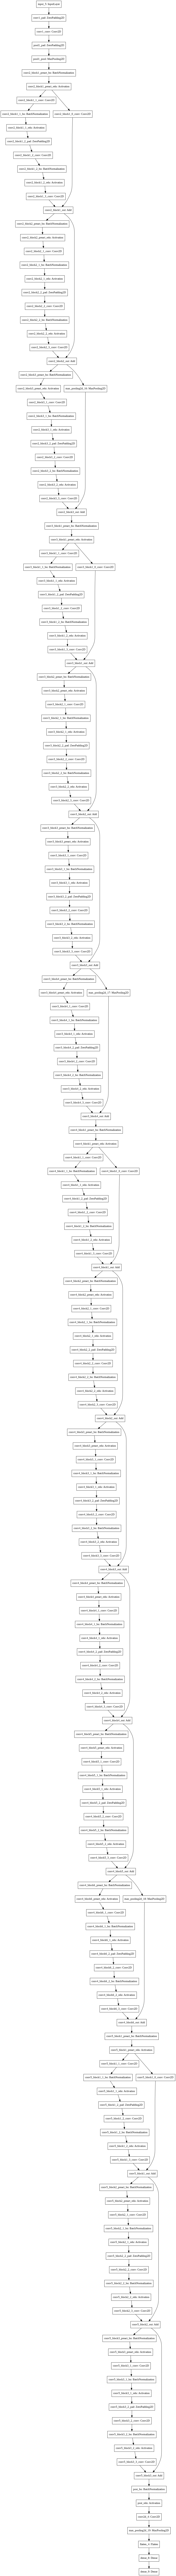

# **START**

In [176]:
model=keras.models.load_model('/content/model_final.h5')

In [177]:
from keras.callbacks import ReduceLROnPlateau

In [200]:
#And now we are fitting the model.
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2,
                              patience=5, min_lr=0.001)
hist = model.fit(training_set,
                validation_data = testing_set,
                epochs = 30,class_weight=class_weight,callbacks=[reduce_lr])

Epoch 1/30
  9/625 [..............................] - ETA: 7:20 - loss: 0.0992 - accuracy: 0.9688

KeyboardInterrupt: ignored

In [198]:

from tensorflow.keras.models import load_model

from google.colab import files

model.save('model_final2.h5')

files.download('model_final2.h5') 


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

In [154]:

import shutil

shutil.copy('/content/model_final.h5','/content/gdrive/MyDrive/model_final.h5')

OSError: ignored

In [188]:
from sklearn.metrics import accuracy_score
predict=model.predict(testing_set)
y_pred = np.argmax(predict, axis=1)
accuracy_score(testing_set.labels,y_pred)



0.73564805681594

In [189]:
from sklearn.metrics import confusion_matrix

y_true=testing_set.labels
cm=confusion_matrix(y_true, y_pred, labels=[0, 1, 2, 3, 4, 5, 6, 7])



In [199]:
cm

array([[ 115,   35,    9,    0,    8,    0,    7,    0],
       [  41,  591,    6,    1,   16,    2,    6,    2],
       [  39,   51,  324,    1,   66,   33,   10,    1],
       [   2,   10,    0,   32,    1,    2,    1,    0],
       [  16,   47,   59,    2,  634,  139,    7,    1],
       [  16,  145,  163,    8,  300, 1916,   17,   10],
       [   9,   24,    5,    0,    5,    4,   79,    0],
       [   0,    4,    2,    0,    5,    2,    0,   38]])

In [190]:
def true_positve_rate(cm):
  for i in testing_set.class_indices.keys():
    ID=testing_set.class_indices[i]
    print('true_positve_rate of '+i,cm[ID][ID]/cm[ID].sum())




In [191]:
true_positve_rate(cm)

true_positve_rate of AK 0.6609195402298851
true_positve_rate of BCC 0.8887218045112782
true_positve_rate of BKL 0.6171428571428571
true_positve_rate of DF 0.6666666666666666
true_positve_rate of MEL 0.7005524861878453
true_positve_rate of NV 0.7440776699029126
true_positve_rate of SCC 0.626984126984127
true_positve_rate of VASC 0.7450980392156863


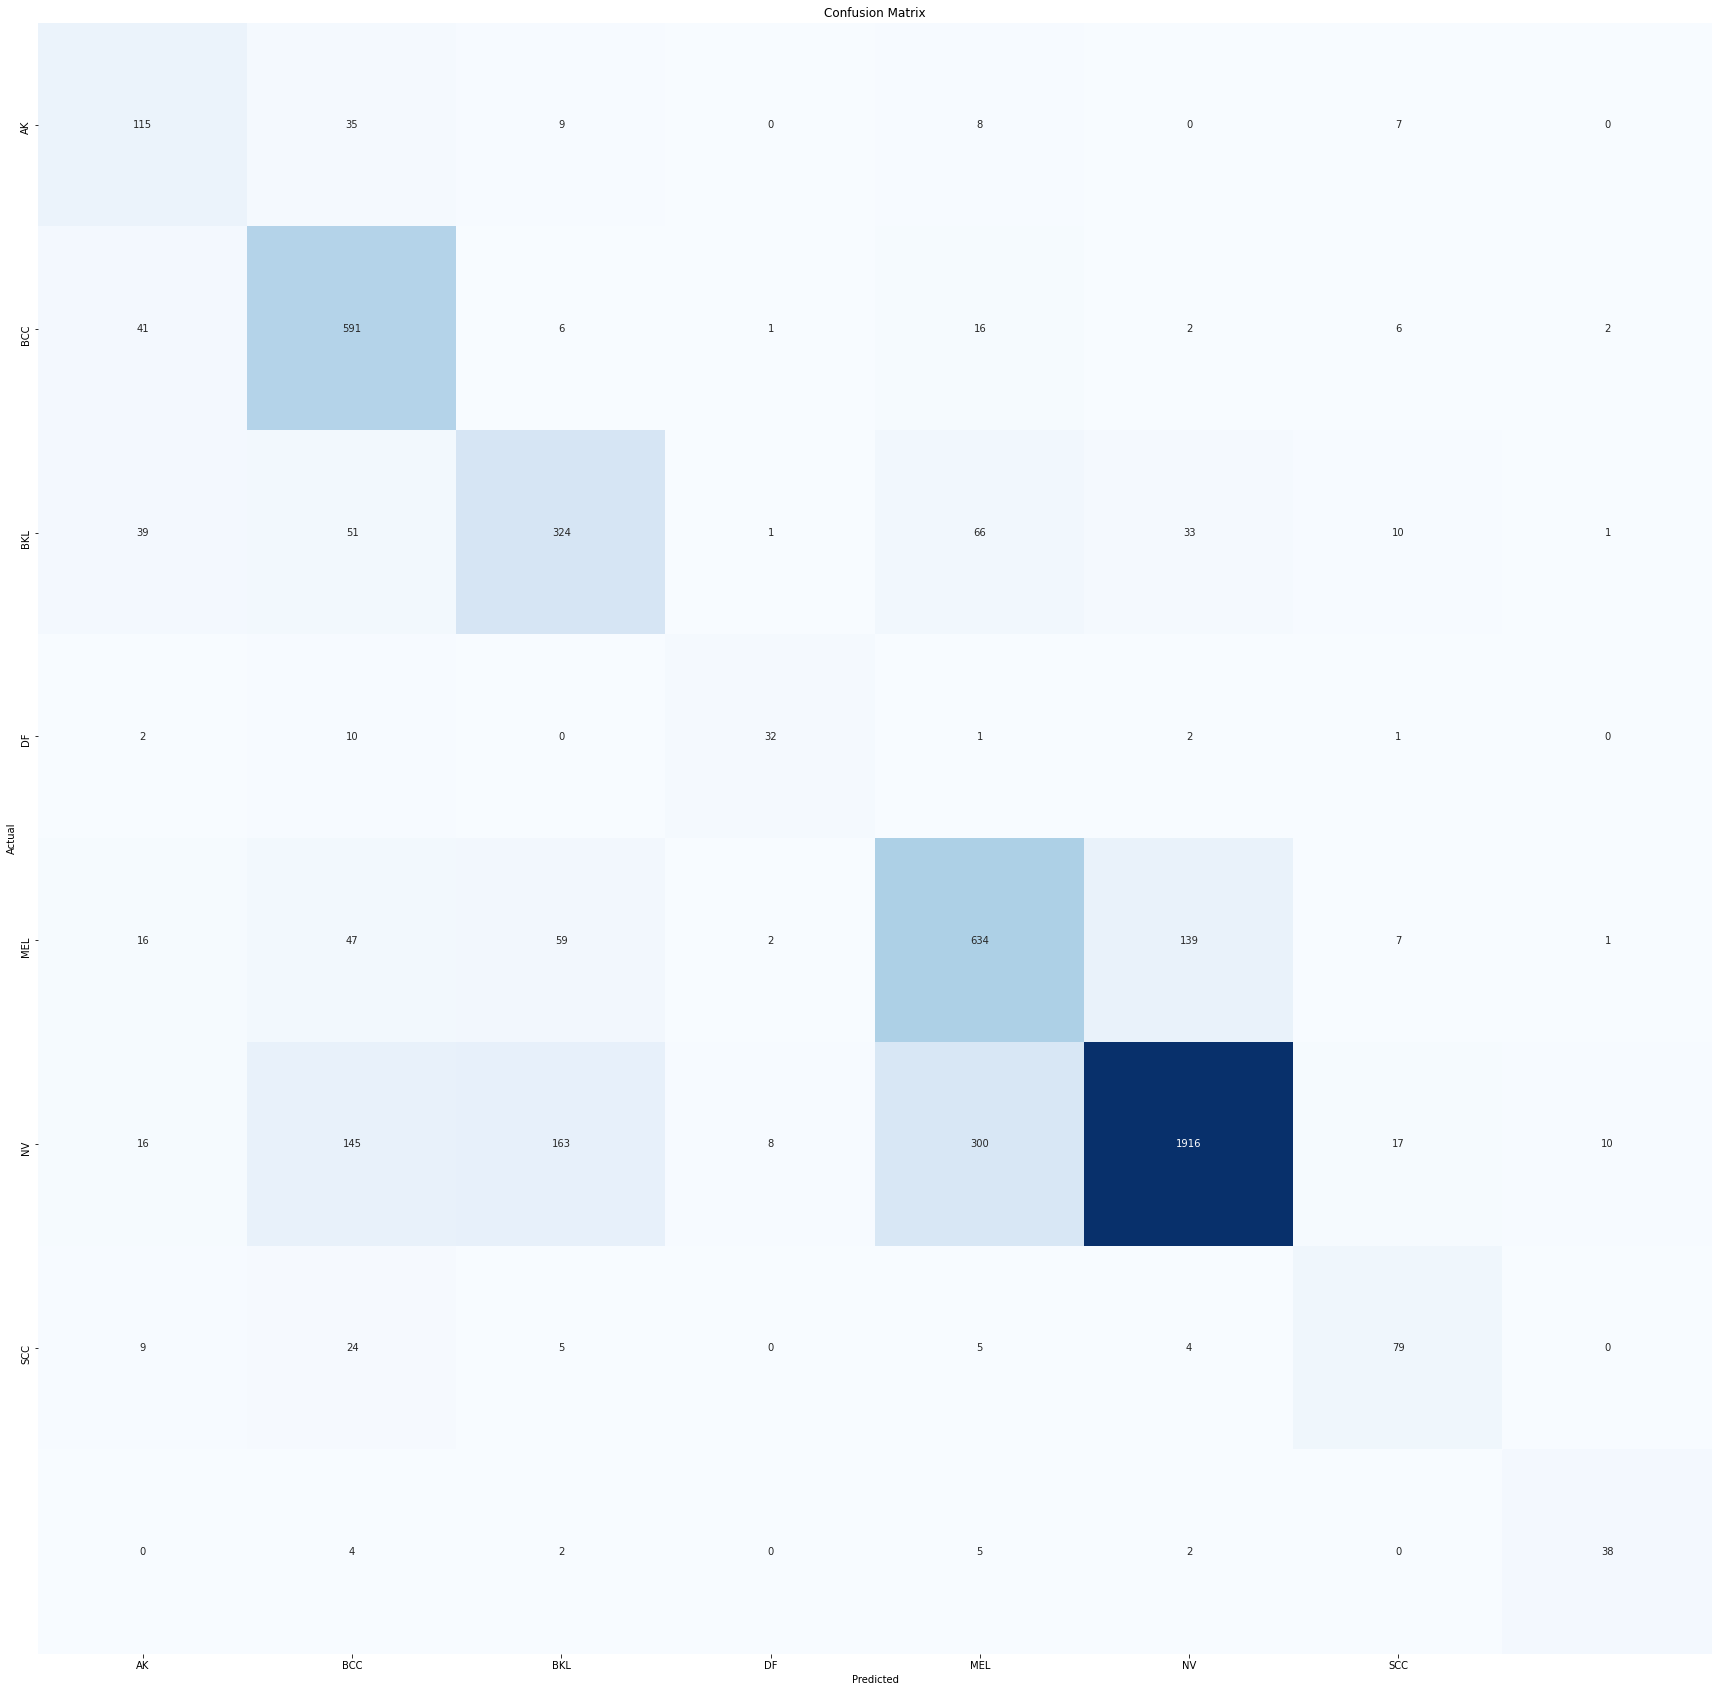

In [192]:
import seaborn as sns
plt.figure(figsize=(30, 30))
sns.heatmap(cm, annot=True, fmt='g', vmin=0, cbar=False, cmap='Blues')

plt.xticks(np.arange(7) + 0.5, testing_set.class_indices.keys())
plt.xlabel("Predicted")

plt.yticks(np.arange(7) + 0.5, testing_set.class_indices.keys())
plt.ylabel("Actual")

plt.title("Confusion Matrix")

plt.show()

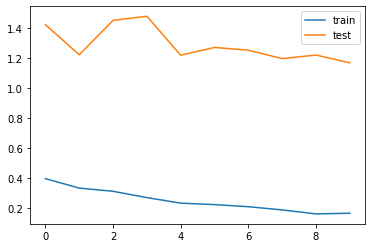

In [193]:
from matplotlib import pyplot as plt
# plot history
plt.plot(hist.history['loss'], label='train')
plt.plot(hist.history['val_loss'], label='test')
plt.legend()
plt.show()

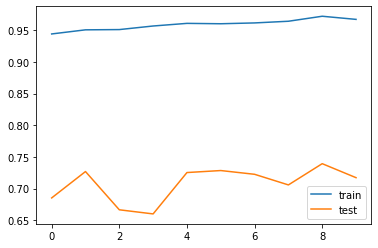

In [194]:
from matplotlib import pyplot as plt
# plot history
plt.plot(hist.history['accuracy'], label='train')
plt.plot(hist.history['val_accuracy'], label='test')
plt.legend()
plt.show()

In [195]:
model_acc = model.evaluate(testing_set)

159/159 [==============================] - 75s 470ms/step - loss: 1.1862 - accuracy: 0.7356


In [196]:
model_acc

[1.1862057447433472, 0.7356480360031128]

In [197]:
model=new_model

NameError: ignored